In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from pmdarima import auto_arima


In [12]:
df=pd.read_csv('Kiriwaneliya_project.csv')
df.head()



,Year,Month,Rainfall,Temp_min,Temp_max,Hum_min,Hum_max
0,2010,January,104.699999,11.0,20.2,NaN,NaN
1,2010,February,34.600000,12.0,22.1,NaN,NaN
2,2010,March,128.300001,11.5,23.0,NaN,NaN
3,2010,April,153.200000,13.1,22.5,NaN,NaN
4,2010,May,174.300002,14.1,21.7,NaN,NaN


In [13]:
df["Time"]=df["Year"].astype(str)+"-"+df["Month"].astype(str)

In [14]:
df.head()

,Year,Month,Rainfall,Temp_min,Temp_max,Hum_min,Hum_max,Time
0,2010,January,104.699999,11.0,20.2,NaN,NaN,2010-January
1,2010,February,34.600000,12.0,22.1,NaN,NaN,2010-February
2,2010,March,128.300001,11.5,23.0,NaN,NaN,2010-March
3,2010,April,153.200000,13.1,22.5,NaN,NaN,2010-April
4,2010,May,174.300002,14.1,21.7,NaN,NaN,2010-May


In [15]:
temperature_min=df[["Time","Temp_min"]]
temperature_min.head()

,Time,Temp_min
0,2010-January,11.0
1,2010-February,12.0
2,2010-March,11.5
3,2010-April,13.1
4,2010-May,14.1


In [16]:
#removing missing values
df=temperature_min.dropna(how="any")

In [17]:
#Creating time column
temperature_min['Time'] = pd.to_datetime(temperature_min['Time'])

In [18]:
#Checking for missing values
temperature_min.isna().sum()

Time        0
Temp_min    1
dtype: int64

In [19]:
#removing missing values
temp=temperature_min.dropna(how="any")
temp.head()

,Time,Temp_min
0,2010-01-01,11.0
1,2010-02-01,12.0
2,2010-03-01,11.5
3,2010-04-01,13.1
4,2010-05-01,14.1


In [27]:
temp.set_index('Time',inplace=True)

KeyError: "None of ['Time'] are in the columns"

<AxesSubplot:xlabel='Time'>

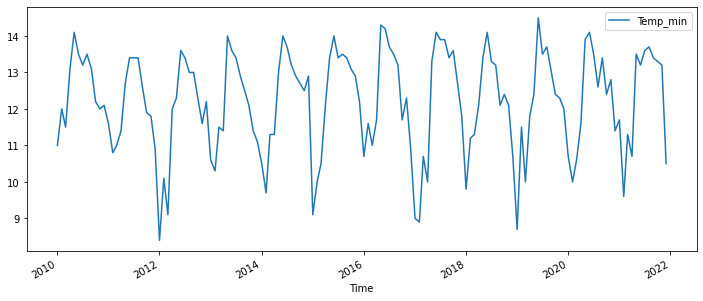

In [28]:
temp.plot(figsize=(12,5))

It can't be seen a clear trend.But there is some evidence for seasonality.

In [31]:
### ADF Test
test_result=adfuller(temp['Temp_min'])
#Ho: The series is non stationary
#H1: The series is stationary

def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
adfuller_test(temp['Temp_min'])

ADF Test Statistic : -3.548922973238318
p-value : 0.006816032452833279
#Lags Used : 13
Number of Observations Used : 129
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [32]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(temp['Temp_min'])

KPSS Statistic: 0.08402924796591484
p-value: 0.1
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\wasan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\wasan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [33]:
#PhillipsPerron Test
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(temp['Tempurature'].astype(float))
print(pp.summary().as_text())

KeyError: 'Tempurature'

C:\Users\wasan\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


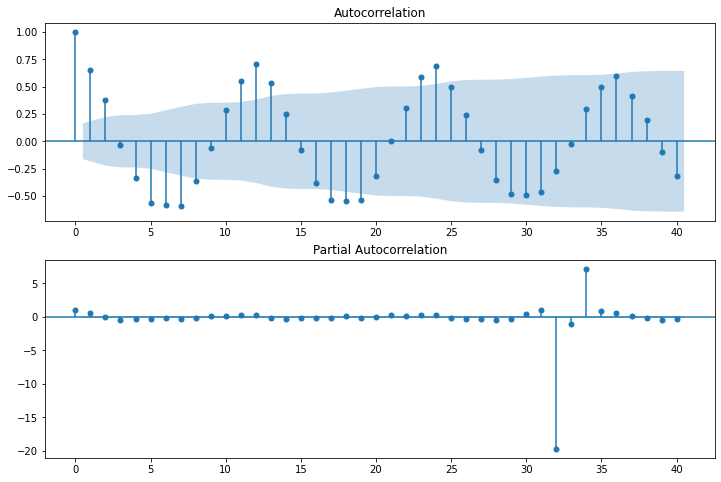

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp['Temp_min'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(temp['Temp_min'],lags=40,ax=ax2)

# Get an advice from sir

PACF shows an abnormal behavior. I feel here it is better to go with deep learning rather than classical method.